* ### Here I am selecting a Wikipedia page through a random generator of wikipedia pages.
* ### However, one may start with a predifined Wikipedia page of one's own choice. In this case, one needs to modify Cell 7 below.
* ### Subsequently, the goal is to find the set of hyperlinks of the original (random) page to other Wikipedia webpages and the graph (directed network) which is formed by all the hyperlinks among the latter webpages. 
* ### To be able to controll the size of this graph, we are setting the minimum and the maximum number of hyperlinks from the original (random) page into a fixed interval of values (parameters n and N below).

In [1]:
# To install the wikipedia module, 
# you need to run the following (after commenting it out):

#!pip install wikipedia

In [2]:
# To install pygraphviz with conda, 
# you need to run the following IN A TERMINAL (after commenting it out):

# conda install -c alubbock pygraphviz

In [3]:
# To install pygraphviz with pip, 
# you need to run the following (after commenting it out):
#!pip install graphviz
#!pip install python-graphvis
#!pip install pygraphviz

In [4]:
import wikipedia
import random
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
import warnings; warnings.simplefilter('ignore')

In [5]:
n=10  # minimum number of hyperlinks of the selected wikipedia page
N=31  # maximum number of hyperlinks of the selected wikipedia page

### Random Selection of a Wikipedia Page

In [7]:
# If this cell runs very slowly, take lower values of n and N.

while True:
    try:
        page=wikipedia.page(wikipedia.random())
    except wikipedia.DisambiguationError as e:
        pass
    except wikipedia.exceptions.PageError as e:
        pass
    hl=sorted([w.replace(" ","_") for w in page.links])
    if len(hl)>n and len(hl)<N:
        break
        
p=sorted([w.replace(" ","_") for w in page.links])

print "The %i hyperlinks from the (randomly) selected '%s' Wikipedia page are:" %(len(p),page.title)
print
for i in range(len(p)):
    print "%i. %s" %(i+1,p[i])

The 14 hyperlinks from the (randomly) selected 'Başçayır, Köşk' Wikipedia page are:

1. Aydın_Province
2. Daylight_saving_time
3. Districts_of_Turkey
4. Eastern_European_Summer_Time
5. Eastern_European_Time
6. Geographic_coordinate_system
7. Köşk
8. List_of_sovereign_states
9. Provinces_of_Turkey
10. Time_zone
11. Turkey
12. Turkish_Statistical_Institute
13. UTC+2
14. UTC+3


### Using a Predefined Wikipedia Page

In [8]:
# # IF ONE WANTS TO USE A PREDEFINED WEBPAGE, 
# # one should uncomment and run the following lines
# # Here, I've considered as predefined Wikipedia page the page of the
# # 'United_States_women%27s_national_soccer_team' but you may take
# # instead anything you like. Notice, that subsequently I am filtering
# # a random sample of 20 hyperlinks. This might need to change if the
# # page you have selected has fewer hyperlinks.

# page=wikipedia.page('United_States_women%27s_national_soccer_team') #'https://en.wikipedia.org/wiki/United_States_women%27s_national_soccer_team'

# p=random.sample(sorted([w.replace(" ","_") for w in page.links]),20)

# print "The %i hyperlinks from the (randomly) selected '%s' Wikipedia page are:" %(len(p),page.title)
# print
# for i in range(len(p)):
#     print "%i. %s" %(i+1,p[i])

In [9]:
eds=[]
for pp in p:
    try:
        ppp=sorted([w.replace(" ","_") for w in wikipedia.page(pp).links])
    except wikipedia.exceptions.PageError as e:
        pass
    ppp=[x for x in ppp if x!=pp]
    ih=set(ppp).intersection(set(p))
    if len(ih)>0:
        print "%s has %i hyperlinks to webpages: \n %s" %(pp,len(ih),", ".join(list(ih)))
        print
        for q in ih:
            eds.append((pp,q))

Aydın_Province has 5 hyperlinks to webpages: 
 Turkey, Köşk, Districts_of_Turkey, Geographic_coordinate_system, Provinces_of_Turkey

Daylight_saving_time has 3 hyperlinks to webpages: 
 Turkey, Time_zone, Eastern_European_Time

Districts_of_Turkey has 4 hyperlinks to webpages: 
 Turkey, Köşk, Aydın_Province, Provinces_of_Turkey

Eastern_European_Summer_Time has 4 hyperlinks to webpages: 
 Turkey, Time_zone, Eastern_European_Time, Daylight_saving_time

Eastern_European_Time has 5 hyperlinks to webpages: 
 Turkey, Eastern_European_Summer_Time, UTC+2, Time_zone, Daylight_saving_time

Köşk has 5 hyperlinks to webpages: 
 Turkey, Provinces_of_Turkey, Districts_of_Turkey, Aydın_Province, Geographic_coordinate_system

List_of_sovereign_states has 1 hyperlinks to webpages: 
 Turkey

Provinces_of_Turkey has 4 hyperlinks to webpages: 
 Turkey, Districts_of_Turkey, Aydın_Province, Turkish_Statistical_Institute

Time_zone has 3 hyperlinks to webpages: 
 Turkey, Daylight_saving_time, Eastern_Europe

In [10]:
# In case you could not install pygraphviz, replace the command bellow:
# pos=graphviz_layout(G)
# by 
# pos=nx.spring_layout(G,k)
# where you set k equal to 1. or any float less or larger that 1.
# Try a few assignments of k until you find the plot that looks more satisfactory.

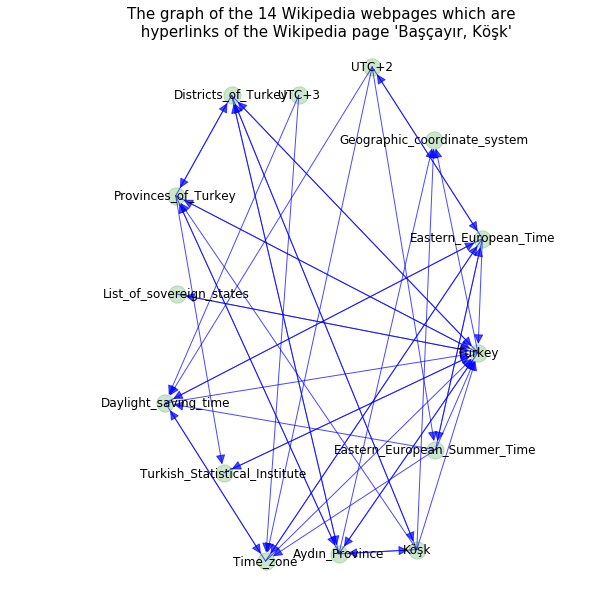

In [13]:
G=nx.DiGraph()
G.add_edges_from(eds)
# print len(G.nodes()),len(G.edges())

#pos=graphviz_layout(G)

pos=nx.spring_layout(G,3)

plt.figure(figsize=(10,10));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.2)
nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
ss="The graph of the %i Wikipedia webpages which are \n hyperlinks of the Wikipedia page '%s'" %(len(G.nodes()),page.title)
plt.title(ss,fontsize=15);
plt.margins(x=0.3, y=0) 

###  60-100 word description for each link. 

1.	<b> Aydin Province – </b> This province is located in Turkey and the contents of the page contain information on the history (founded by the ancient Thracians), geography (province divided into 17 districts), economy (driven by tourism and agriculture), places of interest (many antique ruins), culture (home of Zybek folk art), infrastructure (a major motorway built in the 1990’s), and notable people (like Anthemius of Tralles) of the province.


2.	<b> Daylight saving time – </b> The rationale for using daylight saving time (DST) includes having more awake hours in the sun to complete activities as well as decreases in energy consumption. Additional benefits and drawbacks for the economy, public safety, and health are listed on the page. Ancient civilizations have been recorded adjusting daily schedules, but it was New Zealand entomologist George Hudson who first proposed DST and Port Arthur, Ontario to be the fist city to enact DST in 1908. The procedure of adjusting DST is documented, noting a one-hour shift in time is customary, but also politics can affect this. 


3.	<b> Districts of Turkey – </b> There are 957 districts of Turkey with the district having the same name as the district capital. Each district has at least one municipality which is headed by an elected mayor and is responsible for administering the local government. Each district is listed with its corresponding population and a map is provided to show the location of each district.


4.	<b> Eastern European Summer Time – </b> EEST is one of the names of the UTC+3 time zone and is used as the daylight saving time by several countries in Europe and the Middle East. The page lists the countries using EEST and how long they have been using EEST. It is also noted that since 1996, EEST is observed from the last Sunday in March to the last Sunday in October. 


5.	<b> Eastern European Time – </b> EET is one of the names of the UTC+2 time zone. The page lists the countries that use EET all year round, countries that use EET during the winter only, and countries that have used EET in the past. Anomalies are also listed where areas outside of UTC+2 longitudinal geography are using UTC+2 as well as areas inside of UTC +2 longitudinal geography that are using other time zones.


6.	<b> Geographic coordinate system – </b> A system of coordinates allowing every location on Earth to be specified by numbers, letters or symbols such latitude, longitude, and elevation. Eratosthenes of Cyrene is credited for developing the first geographic coordinate system with Hipparchus of Nicaea improving the system. Definitions and examples of horizontal, vertical, and 3D Cartesian coordinates are provided on the page.


7.	<b> Köşk – </b> This is a district in Aydin Province in Turkey as well as a noun in Turkish that refers to an ornate, wooden mansion. A map of Tukey is provided with the location of Köşk, along with statistics on area size and population.


8.	<b> List of sovereign states – </b> The page lists the sovereign states around the world along with the status and recognition of the states sovereignty. While Turkey recognizes the Turkish Republic of Northern Cyprus, Cyprus is not recognized by Turkey due to the Cyprus dispute.


9.	<b> Provinces of Turkey – </b> Turkey has 81 provinces which are also split into different districts. Each province is led by an appointed governor from the Ministry of the Interior. Each governor is listed on the page along with their dates they started in office. All provinces are listed along with the statistics on area and population size. Each province’s ISO code suffix number, Nomenclature of Territorial Units for Statistics, and phone prefix are also listed on the page.


10.	<b> Time zone – </b> This page has the history of timekeeping including solar time, railway time, and Greenwich Mean Time. Quirico Filopnati introduced the idea of worldwide time zones in a book he wrote in 1858 called Miranda! Notation of time, such as ISO 8601 and UTC are noted. A section of the page lists all UTC offsets worldwide and addresses the topic of time zone conversions along with daylight saving time. There is also a section on computer systems and the internet and how time gets handled across various operating systems and programming languages. 


11.	<b> Turkey – </b> This page has information on the country and not the bird. The etymology originates from the English name meaning “land of the Turks.” The history of Turkey begins with the prehistory of Anatolia and Eastern Thrace and succeeds with the early Christian and Byzantine period followed by the Seljuks and the Ottoman Empire before the current Republic of Turkey. Additional information on administrative divisions, politics, geography, economy, demographics, and culture can also be found on this page. 


12.	<b> Turkish Statistical Institute – </b> This is a Turkish government agency more commonly known as TurkStat that produces various statistics on Turkey. Statistics date back to 1926 and include population, resource, economy, societal, and cultural statistics. 


13.	<b> UTC+2 - </b> Identifies the 2 hour offset from Coordinated Universal Time (UTC) and lists the countries which have UTC+2 as standard time (all year round), have standard time in the Northern hemisphere for winter only, and as daylight saving time in the Northern Hemisphere for summer only. 


14.	<b> UTC+3 - </b> Identifies the 3 hour offset from Coordinated Universal Time (UTC) and lists the countries which have UTC+3 as standard time (all year round) and have standard time in the Northern hemisphere for summer only.

